In [1]:
import sklearn
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC

### Ćwiczenie 1 (1 pkt)
    a) znajdź największą i najmniejszą wartość w wektorze c. 
    b) stworzyć analogicznie wektor d i policzyć iloczyn skalarny. Ile wynosi jak zwiększymy ilość wymiarów?

In [2]:
c = np.random.uniform(size=(5,)) # wektor 5 pseudolosowych liczb
print('a)')
print("c = ", str(c))
print("Max(c) = " + str(max(c)) + "\nMin(c) = " + str(min(c)))

print('\nb)')
d = np.random.uniform(size=(5,)) # wektor 5 pseudolosowych liczb
print("c = ", c)
print("d = ", d)
print("Dot product c * d = " + str(np.dot(c,d)))
print('\n')
a = np.random.uniform(size=(4,6))
b = np.random.uniform(size=(4,6))
print("a dimensions =", a.shape)
print("b dimensions =", b.shape)
print("Dot product a * b dimensions =", np.inner(a,b).shape)

a)
c =  [ 0.8728126   0.99361071  0.96951032  0.18352618  0.54587604]
Max(c) = 0.993610714038
Min(c) = 0.183526184813

b)
c =  [ 0.8728126   0.99361071  0.96951032  0.18352618  0.54587604]
d =  [ 0.00641856  0.40394947  0.03038392  0.98225929  0.69587873]
Dot product c * d = 0.996562071296


a dimensions = (4, 6)
b dimensions = (4, 6)
Dot product a * b dimensions = (4, 4)


### Ćwiczenie 2 (1 pkt)

Prosze narysowac wylosowac 100 punktow z np.random.uniform z 2 wspolrzednymi i narysowac za pomoc plt.scatter

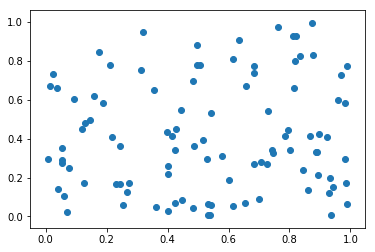

In [3]:
x = np.random.uniform(size=(100,))
y = np.random.uniform(size=(100,))

plt.scatter(x,y) # Przyklad wywolania plt.scatter
plt.show()

### Cwiczenie 3 (1 pkt): 
    a) Jaka jest średnia długość płatka w zbiorze danych? (pierwsza cecha przykładu, podpowiedź: macierz przykładów jest w iris.data). 
    b) Narysuj histogram długości płatka (plt.hist)

a)
Mean = 5.84333333333

b)


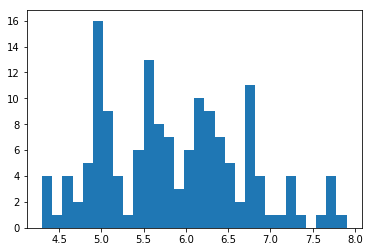

In [4]:
iris = load_iris()
samples = iris.data[:,0]
print("a)\nMean = " + str(np.mean(samples)) + '\n\nb)')
plt.hist(samples, bins=30)
plt.show()

### Ćwiczenie 5 (1 pkt): 
    a) We wcześniejszym przykładzie narysowałem wykres na podstawie 1 i 2 cechy (2 z 4 cech). Proszę sprawdzić czy jakaś inna kombinacja cech poprawia separowalność przykładów (łatwiej je oddzielić kreską)

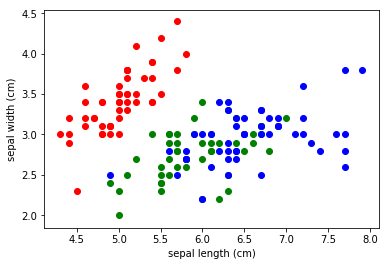

In [5]:
plt.scatter(iris.data[iris['target']==0, 0], iris.data[iris['target']==0, 1], color='r')
plt.scatter(iris.data[iris['target']==1, 0], iris.data[iris['target']==1, 1], color='g')
plt.scatter(iris.data[iris['target']==2, 0], iris.data[iris['target']==2, 1], color='b')
plt.xlabel(iris['feature_names'][0])
plt.ylabel(iris['feature_names'][1])
plt.show()

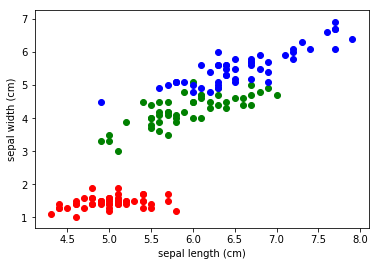

In [6]:
plt.scatter(iris.data[iris['target']==0, 0], iris.data[iris['target']==0, 2], color='r')
plt.scatter(iris.data[iris['target']==1, 0], iris.data[iris['target']==1, 2], color='g')
plt.scatter(iris.data[iris['target']==2, 0], iris.data[iris['target']==2, 2], color='b')
plt.xlabel(iris['feature_names'][0])
plt.ylabel(iris['feature_names'][1])
plt.show()

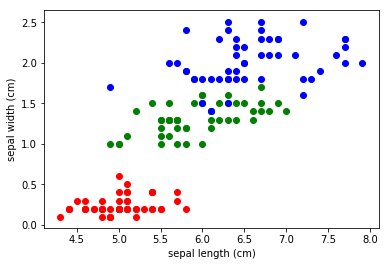

In [7]:
plt.scatter(iris.data[iris['target']==0, 0], iris.data[iris['target']==0, 3], color='r')
plt.scatter(iris.data[iris['target']==1, 0], iris.data[iris['target']==1, 3], color='g')
plt.scatter(iris.data[iris['target']==2, 0], iris.data[iris['target']==2, 3], color='b')
plt.xlabel(iris['feature_names'][0])
plt.ylabel(iris['feature_names'][1])
plt.show()

### Ćwiczenie 6 (2 pkt)

Zaprogramuj funkcje predict() ktora bedzie zwracac to co pierwszy_model.predict. Funkcja powinna przejsc testy i implementowac nastepujacy interfejs

In [8]:
from sklearn.svm import LinearSVC
# Regresja liniowa. Jeden z wielu modeli, których końcowym wynikiem jest linia prosta :)
pierwszy_model = LinearSVC() 
X,Y = iris.data[:, 0:2], iris.target
Y = Y==0 # Troche magii żeby przewidywał tylko Iris Setosa albo "nie Iris Setosa"
pierwszy_model.fit(X, Y) # Wspominany interfejs! Po zrobieniu fit mamy linię prostą

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [9]:
#"Jeśli -1.541405 * długość_płatka + 2.28320578 * szerokość_płatka >= 0 to jest to kwiatek gatunku Iris Setosa"
def predict(z):
    return (np.dot(pierwszy_model.coef_, z) + pierwszy_model.intercept_ >= 0)

In [10]:
for x in np.linspace(4.5, 8, 10):
    for y in np.linspace(4, 10, 10):
        assert pierwszy_model.predict([[x, y]]) == predict([x, y]), "Failed on {},{}".format(x, y)

### Cwiczenie 7 (2 pkt) 

1. Znalezc C ktore na X_test, Y_test ma 100%. 
2. Narysowac wykres, na osi X wartosc C, na osi Y dokladnosc dla danego C

In [11]:
# Załadujmy jeszcze raz dane iris
iris = load_iris()
X,Y = iris.data, iris.target
# Dzielimy (scikit-learn)
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

/usr/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


a)
C = 4.000000000000002

b)


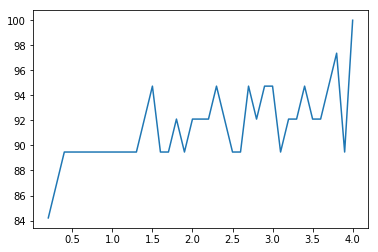

In [12]:
x = []
y = []
step = 0.1
tmp = 0

while(tmp != 100.0):
    drugi_model = LinearSVC(C=step) 
    drugi_model.fit(X_train, Y_train) # Wspominany interfejs! Po zrobieniu fit mamy linię prostą
    Y_test_predicted = drugi_model.predict(X_test)
    tmp = 100 * sklearn.metrics.accuracy_score(Y_test, Y_test_predicted)
    #print("Dokładność modelu to: ",tmp, "%")
    step += 0.1
    x.append(step)
    y.append(tmp)
print("a)\nC = " + str(step) + "\n\nb)") 
 

plt.plot(x, y) # Przyklad wywolania plt.scatter
plt.show()